### Multivariate Multistep Time Series Forecasting using Stacked LSTM sequence to sequence Autoencoder in Tensorflow 2.0 / Keras 

In [1]:
#plotting and analysis library
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import pandas as pd
#model library
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM, Input, Dropout
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2
import time
from scipy.stats import spearmanr
from scipy.stats import pearsonr, linregress

In [2]:
df=pd.read_csv("Discharge5_H1.csv")
attrib=['name','cycle','datetime','ambient_temp','capacity','voltage_measured','current_measured','temperature_measured','time','TIEDVD']
attrib1=['name','cycle','datetime','ambient_temp','capacity','voltage_measured','current_measured','temperature_measured','time']
param = ['TIEDVD']
dataset_f=df[param]

In [3]:
dataset_df1 = df[attrib1]
dataset_df1.describe()
dataset_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  168 non-null    object 
 1   cycle                 168 non-null    int64  
 2   datetime              168 non-null    object 
 3   ambient_temp          168 non-null    int64  
 4   capacity              168 non-null    float64
 5   voltage_measured      168 non-null    float64
 6   current_measured      168 non-null    float64
 7   temperature_measured  168 non-null    float64
 8   time                  168 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 11.9+ KB


In [4]:
corr = dataset_df1.corr()
round(corr,2)

,cycle,ambient_temp,capacity,voltage_measured,current_measured,temperature_measured,time
cycle,1.00,NaN,-0.99,0.94,-0.17,-0.53,-0.98
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capacity,-0.99,NaN,1.00,-0.96,0.17,0.59,0.98
voltage_measured,0.94,NaN,-0.96,1.00,-0.17,-0.51,-0.95
current_measured,-0.17,NaN,0.17,-0.17,1.00,0.09,0.16
temperature_measured,-0.53,NaN,0.59,-0.51,0.09,1.00,0.42
time,-0.98,NaN,0.98,-0.95,0.16,0.42,1.00


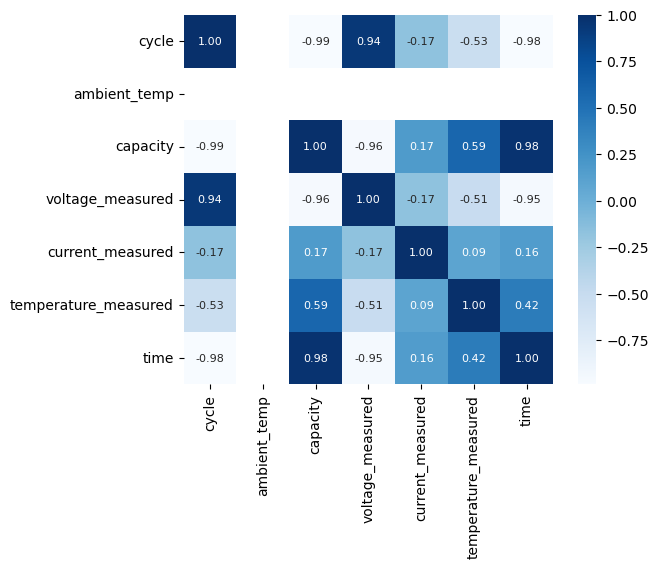

In [5]:
sns.heatmap(corr, cbar=True, annot=True, square=True, cmap='Blues', fmt='.2f', annot_kws={'size': 8});

In [6]:
dataset_df =  df[attrib]
dataset_df.describe()

,cycle,ambient_temp,capacity,voltage_measured,current_measured,temperature_measured,time,TIEDVD
count,168.000000,168.0,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,84.500000,24.0,1.572502,3.471305,-0.001582,35.592079,3129.523887,1805.895452
std,48.641546,0.0,0.190413,0.129420,0.001819,0.951535,246.654499,402.410685
min,1.000000,24.0,1.287453,3.205069,-0.006606,33.973067,2792.485000,1198.734000
25%,42.750000,24.0,1.390021,3.344682,-0.002604,34.907839,2901.343750,1424.094000
50%,84.500000,24.0,1.557085,3.525287,-0.001455,35.644706,3086.078000,1761.328000
75%,126.250000,24.0,1.769163,3.582437,-0.000250,36.252433,3323.230750,2220.191750
max,168.000000,24.0,1.856487,3.621191,0.002106,39.397079,3690.234000,2390.234000


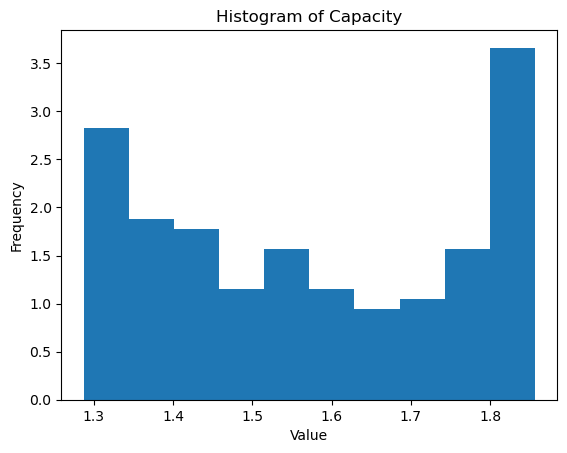

In [7]:
# Create the histogram
plt.hist(dataset_df[['capacity']],density = True)

# Add labels to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Capacity')

# Show the plot
plt.show()

In [8]:
spearman_df = dataset_df[['capacity', 'TIEDVD']]
rho, p = spearmanr(spearman_df)
print (rho)
print(p)

0.998742160649116
1.0555382404294581e-217


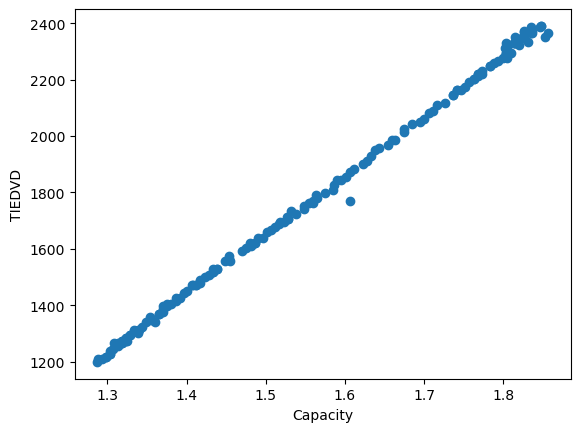

In [9]:
plt.scatter(dataset_df[['capacity']], dataset_df[['TIEDVD']])
plt.ylabel('TIEDVD')
plt.xlabel('Capacity')
plt.show()

In [10]:
dataset_df = dataset_df.replace(to_replace=(1770,547), value=(1805,547))

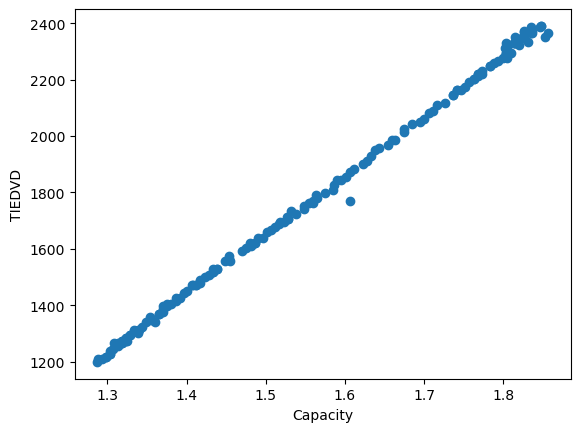

In [11]:
plt.scatter(dataset_df[['capacity']], dataset_df[['TIEDVD']])
plt.ylabel('TIEDVD')
plt.xlabel('Capacity')
plt.show()

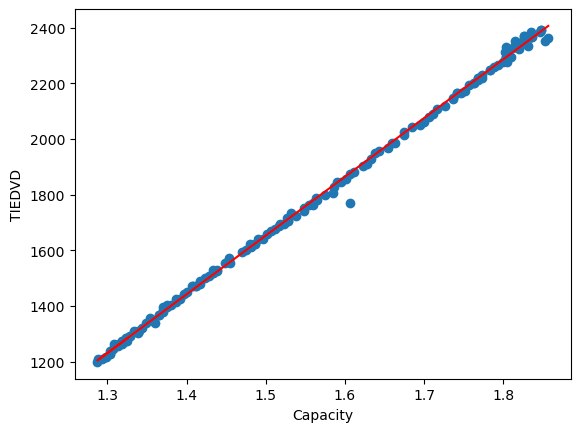

0.999403219520154


In [12]:
slope, intercept, r_value, p_value, stderr = linregress(dataset_df['capacity'], dataset_df['TIEDVD'])

# Plot the data and the regression line
plt.scatter(dataset_df[['capacity']], dataset_df[['TIEDVD']])
plt.plot(dataset_df[['capacity']], intercept + slope * dataset_df[['capacity']], 'r')
plt.ylabel('TIEDVD')
plt.xlabel('Capacity')
plt.show()
print(r_value)

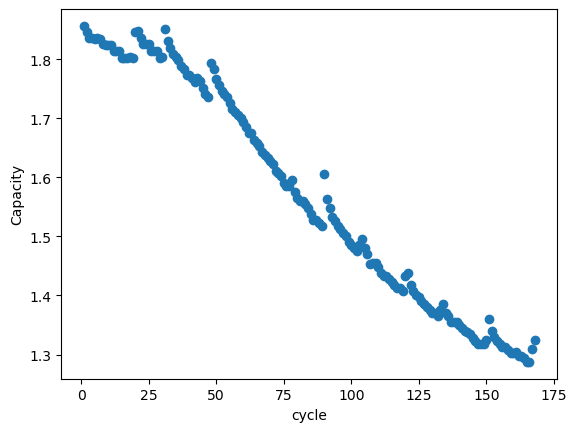

In [13]:
plt.scatter(dataset_df[['cycle']], dataset_df[['capacity']])
plt.ylabel('Capacity')
plt.xlabel('cycle')
plt.show()

Text(0.5, 1.0, 'Kurva Indirect Health Indicator Baterai B0005')

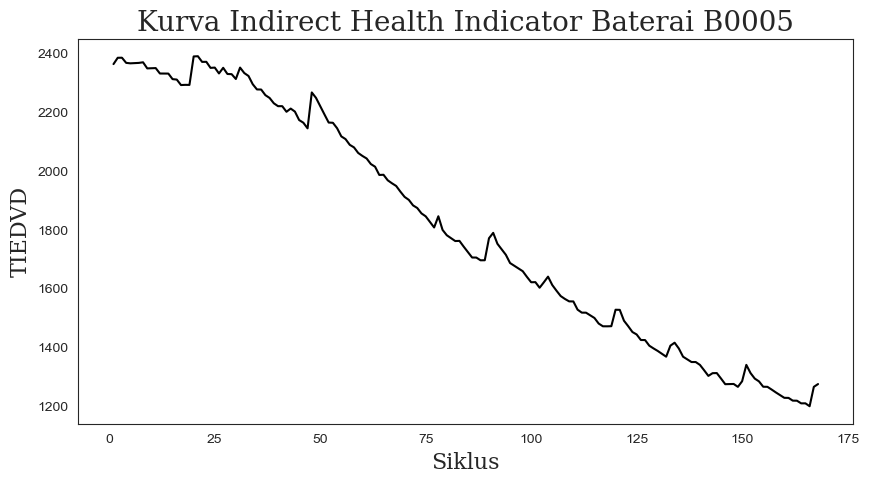

In [14]:
plot_df = df.loc[(df['cycle']>=1),['cycle','TIEDVD']]
sns.set_style("white")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['TIEDVD'], label="Real data", color='black')
plt.ylabel('TIEDVD', family='serif',fontsize=16)
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Siklus', family='serif',fontsize=16)
plt.title('Kurva Indirect Health Indicator Baterai B0005', family='serif',fontsize=20)

In [15]:
datas_cap=df['capacity']
datas_TIEDVD=dataset_df['TIEDVD']
z=np.polyfit(datas_TIEDVD,datas_cap,1)
print(z)

[4.72897821e-04 7.18498039e-01]


In [16]:
l1=[]
for i in range(len(datas_TIEDVD)):
    xx=(z[0] * datas_TIEDVD[i])+z[1]
    l1.append(xx)
df['fit']=l1

Text(0.5, 1.0, 'Mapping')

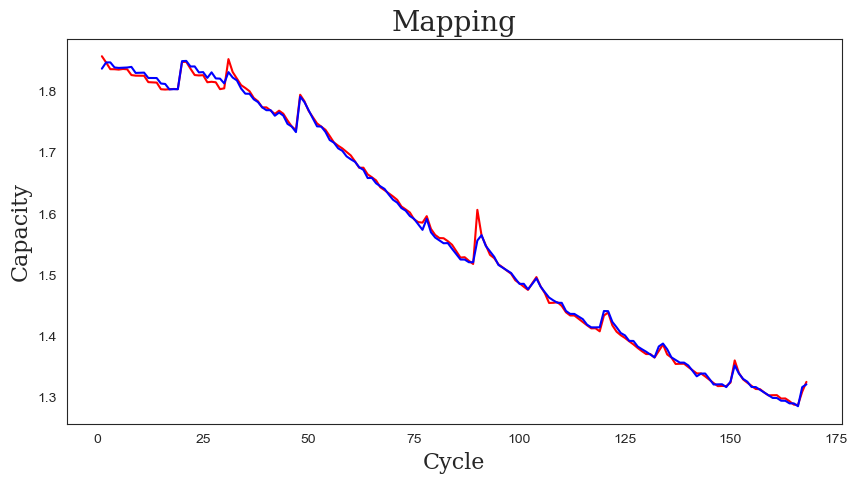

In [17]:
plot_df = df.loc[(df['cycle']>=1),['cycle','capacity']]
plot_df1 = df.loc[(df['cycle']>=1),['cycle','fit']]


sns.set_style("white")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['capacity'],color='red')
plt.plot(plot_df1['cycle'], plot_df1['fit'],'-',color='blue')

plt.ylabel('Capacity', family='serif', fontsize=16)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Cycle',family='serif', fontsize=16)
plt.title('Mapping',family='serif', fontsize=20)

Text(0.5, 1.0, 'Degradasi Baterai B0005')

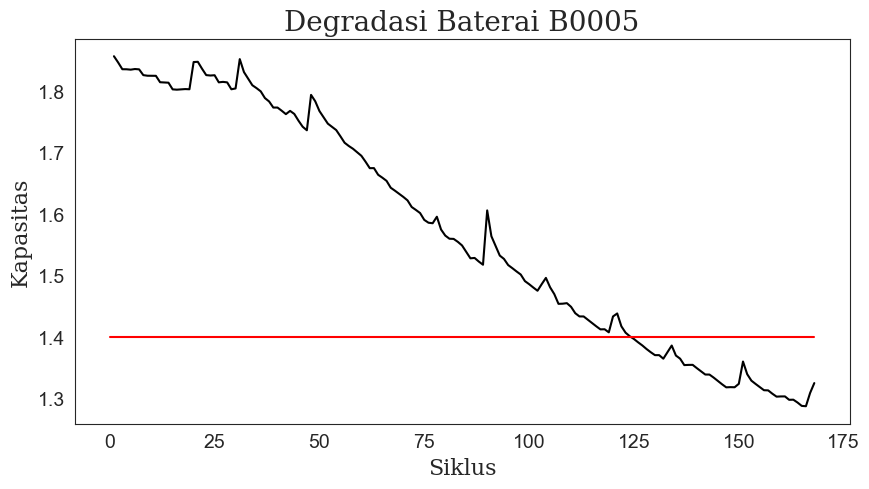

In [18]:
plot_df = df.loc[(df['cycle']>=1),['cycle','capacity']]
sns.set_style("white")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Real data", color='black')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
#Draw threshold
plt.plot([0.,168], [1.4, 1.4], color='red')
plt.ylabel('Kapasitas',family='serif',fontsize=16)
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Siklus', family='serif',fontsize=16)
plt.title('Degradasi Baterai B0005',family='serif', fontsize=20)

In [19]:
n_past = 5
n_future = 1 
n_features = 1

Train - Test Split

In [20]:
l_train = 100
dataset_f = dataset_df[['TIEDVD']]
train_df,test_df = dataset_f[0:l_train], dataset_f[l_train:]  # 50% and 50%
train_df.shape,test_df.shape

((100, 1), (68, 1))

Scaling the values for faster training of the models.

In [21]:
train = train_df
scalers={}

for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s

test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\user\AppData\Local\Temp\ipykernel_19004\3260478294.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\user\AppData\Local\Temp\ipykernel_19004\3260478294.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s


**Converting the series to samples for supervised learning**

In [22]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [23]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

**Model Architecture**

E2D2 ==> Sequence to Sequence Model with two encoder layers and two decoder layers. 

In [24]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(300,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(300, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(300, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(300, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 5, 300),     362400      ['input_1[0][0]']                
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                                  
 lstm_1 (LSTM)                  [(None, 300),        721200      ['lstm[0][0]']                   
                                 (None, 300),                                                 

 **Training the models**

In [25]:
st = time.time()
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32,callbacks=[reduce_lr], verbose =0)

In [26]:
et = time.time()
elapsed_time = et - st
print('Execution time: %.3f'% elapsed_time, 'seconds')

Execution time: 18.120 seconds


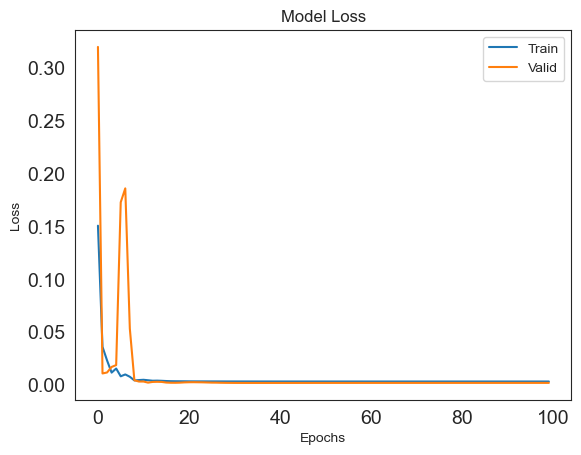

In [27]:
plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

Prediction on validation set

In [28]:
data_total=pd.concat((train,test),axis=0)
inputs=data_total[len(data_total)-len(test)-n_past:].values

In [29]:
X_test=[]
for i in range(n_past,len(inputs)):
    X_test.append(inputs[i-n_past:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [30]:
pred=model_e2d2.predict(X_test)
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
   
    pred[:,:,index]=scaler.inverse_transform(pred[:,:,index])
pred=pred.reshape(len(X_test),-1)
pred=pred[:,0]

Mapping the results

In [31]:
fitting=df[(df['cycle']>l_train)]
fitting=fitting['capacity']
abc=np.array(fitting)
## abc == Capacity
fitting=fitting.values
#test=per
cap=np.array(pred)
li=[]
z=np.polyfit(cap,abc,1)
z

array([4.72628317e-04, 7.16252943e-01])

## Checking Error 

In [32]:
li=[]
for i in range(len(abc)):
    xx=(cap[i] *4.72897821e-04) + 7.18498039e-01
    li.append(xx)
print(len(li))
tests=df[(df['cycle']>l_train)]
tests['Perdict']=li
#per=test
#per['per']=li
###############################

rmse = np.sqrt(mean_squared_error(tests['capacity'],tests['Perdict']))
mae = (mean_absolute_error(tests['capacity'],tests['Perdict']))
R2 = (metrics.r2_score(tests['capacity'],tests['Perdict']))
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)
print("R^2 = %.3f" % R2 )

68
Test MAE: 0.010
Test RMSE: 0.012
R^2 = 0.956


C:\Users\user\AppData\Local\Temp\ipykernel_19004\1266856297.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tests['Perdict']=li


# Visualization

In [36]:
%matplotlib qt
ln = len(train)
k = ln+1
sns.set_style("white")
test['pre']=pred
plot_df = df.loc[(df['cycle']>=1),['cycle','capacity']]
plot_per = tests.loc[(tests['cycle']>=ln),['cycle','Perdict']]
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Aktual", color='black')
plt.plot(plot_per['cycle'],plot_per['Perdict'],label="Prediksi", color='red')
#Draw threshold
plt.plot([0.,168], [1.4, 1.4], label="EOL", color = 'blue')
plt.plot([k,k], [1.9, 1.25], label="Starting Point", color = 'orange', linestyle='dashed')
plt.ylabel('Kapasitas', fontsize=16)
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Siklus', family='serif',fontsize=16)
plt.legend()
plt.title('Prediksi Degradasi Baterai B0005 Mulai Siklus ke-%.0f' % k, family='serif',fontsize=20)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

C:\Users\user\AppData\Local\Temp\ipykernel_19004\1529721813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pre']=pred


# Predict RUL

In [37]:
actual=0
pred=0
Afil=0
Pfil=0
a=tests['capacity'].values
b=tests['Perdict'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.4:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred<1.4:
        k=i
        Pfil=k
        break
print("RUL Actual Battery: "+ str(Afil+1))
print("RUL Predicted Battery: "+ str(Pfil+1))
print("The Actual fail at cycle number: "+ str(Afil+ln+1))
print("The prediction fail at cycle number: "+ str(Pfil+ln+1))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

RUL Actual Battery: 25
RUL Predicted Battery: 27
The Actual fail at cycle number: 125
The prediction fail at cycle number: 127
The error of RUL= 2 Cycle(s)


In [38]:
print('%.3f' % mae)
print('%.3f' % rmse)
print('%.3f' % R2)
print (RULerror)
print('%.3f' % elapsed_time)

0.010
0.012
0.956
2
18.120
